In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Detection
import os
import shutil
import random
import yaml

# Paths to your original images and annotations
image_dir = "/content/drive/MyDrive/Pallets"
annotation_dir = "/content/drive/MyDrive/Pallet_Annotation/yolo_annotations"

#  80% for training, 20% for validation
train_ratio = 0.8

# Define paths for the new directory structure
base_dir = "/content/drive/MyDrive/yolov11"
image_train_dir = os.path.join(base_dir, "images/train")
image_val_dir = os.path.join(base_dir, "images/val")
label_train_dir = os.path.join(base_dir, "labels/train")
label_val_dir = os.path.join(base_dir, "labels/val")

# Create directories
os.makedirs(image_train_dir, exist_ok=True)
os.makedirs(image_val_dir, exist_ok=True)
os.makedirs(label_train_dir, exist_ok=True)
os.makedirs(label_val_dir, exist_ok=True)

# Get list of all images and corresponding annotations
images = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
annotations = [f.replace('.jpg', '.txt').replace('.jpeg', '.txt').replace('.png', '.txt') for f in images]

# Shuffle and split data
data = list(zip(images, annotations))
random.shuffle(data)
train_size = int(len(data) * train_ratio)
train_data = data[:train_size]
val_data = data[train_size:]

# Function to copy files to the appropriate directories
def copy_files(data, image_dest, label_dest):
    for img, ann in data:
        img_src = os.path.join(image_dir, img)
        ann_src = os.path.join(annotation_dir, ann)

        img_dest_path = os.path.join(image_dest, img)
        ann_dest_path = os.path.join(label_dest, ann)

        # Copy image and annotation if both exist
        if os.path.exists(img_src) and os.path.exists(ann_src):
            shutil.copy(img_src, img_dest_path)
            shutil.copy(ann_src, ann_dest_path)

# Copy training and validation files
copy_files(train_data, image_train_dir, label_train_dir)
copy_files(val_data, image_val_dir, label_val_dir)

print("Data split and organized successfully.")

# Define class names (adjust based on your dataset)
class_names = {'0': 'pallets', '1': 'ground'}  # Replace with actual class names

# YAML file content
yaml_content = {
    "train": os.path.abspath(image_train_dir),
    "val": os.path.abspath(image_val_dir),
    "nc": len(class_names),
    "names": class_names
}

# Save YAML file
yaml_path = os.path.join(base_dir, "custom_data.yaml")
with open(yaml_path, "w") as yaml_file:
    yaml.dump(yaml_content, yaml_file, default_flow_style=False)

print("Data split, organized, and YAML file created successfully.")
print(f"YAML file saved at: {yaml_path}")


Data split and organized successfully.
Data split, organized, and YAML file created successfully.
YAML file saved at: /content/drive/MyDrive/yolov11/custom_data.yaml


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 52.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO('yolo11n.pt')  # load a pretrained YOLO detection model
results = model.train(data='/content/drive/MyDrive/yolov11/custom_data.yaml', epochs=20, batch= 16, device = 0,
    hsv_h=0.015,           # HSV augmentation for hue
    hsv_s=0.7,             # HSV augmentation for saturation
    hsv_v=0.4,             # HSV augmentation for value
    degrees=10.0,          # Rotation augmentation
    translate=0.1,         # Translation augmentation
    scale=0.5,             # Scale augmentation
    shear=0.0  )  # train the model



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 357MB/s]


Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/yolov11/custom_data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

100%|██████████| 755k/755k [00:00<00:00, 87.7MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/yolov11/labels/train... 415 images, 0 backgrounds, 0 corrupt: 100%|██████████| 415/415 [00:02<00:00, 145.73it/s]


train: New cache created: /content/drive/MyDrive/yolov11/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/yolov11/labels/val... 104 images, 0 backgrounds, 0 corrupt: 100%|██████████| 104/104 [00:00<00:00, 150.70it/s]


val: New cache created: /content/drive/MyDrive/yolov11/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.65G      1.293      2.721      1.662        170        640: 100%|██████████| 26/26 [00:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all        104        568     0.0145      0.866       0.47      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.65G       1.07      2.051      1.533        223        640: 100%|██████████| 26/26 [00:03<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.90it/s]

                   all        104        568      0.719      0.143      0.417      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.49G      1.099      1.694      1.567        187        640: 100%|██████████| 26/26 [00:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]

                   all        104        568      0.479      0.401      0.414      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.67G      1.054       1.54      1.514        219        640: 100%|██████████| 26/26 [00:03<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.14it/s]

                   all        104        568      0.467      0.387      0.393       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.66G      1.054      1.522      1.509        188        640: 100%|██████████| 26/26 [00:03<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.70it/s]

                   all        104        568      0.407       0.33      0.309      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.65G       1.03      1.482      1.507        177        640: 100%|██████████| 26/26 [00:03<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.34it/s]

                   all        104        568      0.494      0.427      0.458      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.65G      1.015      1.468      1.485        174        640: 100%|██████████| 26/26 [00:03<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.89it/s]

                   all        104        568      0.526      0.431      0.436      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.65G      0.991      1.419      1.477        182        640: 100%|██████████| 26/26 [00:03<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]

                   all        104        568      0.592      0.384      0.426      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.65G     0.9737      1.387      1.466        139        640: 100%|██████████| 26/26 [00:03<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.21it/s]

                   all        104        568      0.631      0.443      0.504      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.64G     0.9504      1.325      1.433        182        640: 100%|██████████| 26/26 [00:03<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.91it/s]

                   all        104        568      0.676      0.429      0.485      0.325


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.63G     0.9263      1.601      1.514         81        640: 100%|██████████| 26/26 [00:04<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.70it/s]

                   all        104        568      0.542      0.515      0.458      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.61G      0.887      1.441      1.465         89        640: 100%|██████████| 26/26 [00:03<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.04it/s]

                   all        104        568      0.586      0.481      0.511      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.63G     0.8588      1.367      1.444         72        640: 100%|██████████| 26/26 [00:03<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.79it/s]

                   all        104        568      0.654      0.471       0.51      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.63G     0.8259      1.333      1.407         78        640: 100%|██████████| 26/26 [00:03<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.78it/s]

                   all        104        568      0.624      0.494      0.542      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.63G     0.8041      1.258      1.378         69        640: 100%|██████████| 26/26 [00:03<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.82it/s]

                   all        104        568      0.717      0.487      0.547      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.63G     0.7761      1.226      1.353         80        640: 100%|██████████| 26/26 [00:03<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.85it/s]

                   all        104        568      0.624      0.512      0.548       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.63G     0.7131      1.146      1.284         68        640: 100%|██████████| 26/26 [00:02<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.77it/s]

                   all        104        568      0.665      0.501      0.557      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.63G     0.7113       1.11      1.312         87        640: 100%|██████████| 26/26 [00:03<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]

                   all        104        568      0.623      0.497      0.545      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.63G     0.6777      1.105      1.288         87        640: 100%|██████████| 26/26 [00:03<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.05it/s]

                   all        104        568      0.695      0.486      0.543      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.63G     0.6842      1.066      1.285         69        640: 100%|██████████| 26/26 [00:03<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.38it/s]

                   all        104        568      0.649      0.508      0.544      0.401



20 epochs completed in 0.028 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]


                   all        104        568      0.694      0.485      0.543      0.408
               pallets        102        425      0.578      0.376      0.445      0.305
                ground         89        143      0.809      0.594      0.641      0.512
Speed: 0.2ms preprocess, 0.7ms inference, 0.0ms loss, 7.1ms postprocess per image
Results saved to runs/detect/train


In [ ]:
print(results)

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dbc76fb7820>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

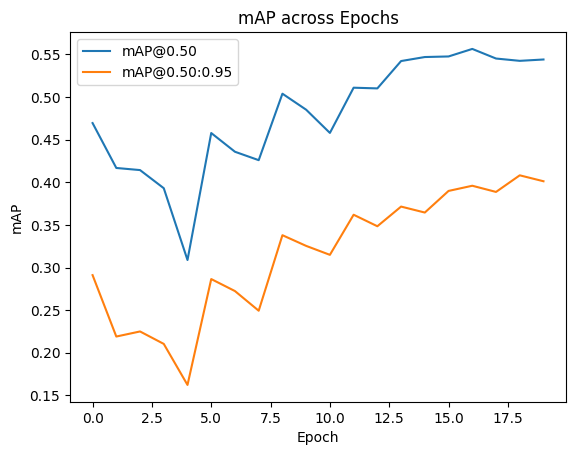

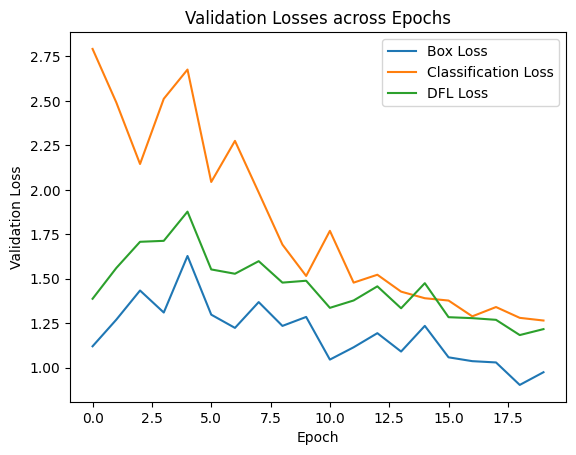

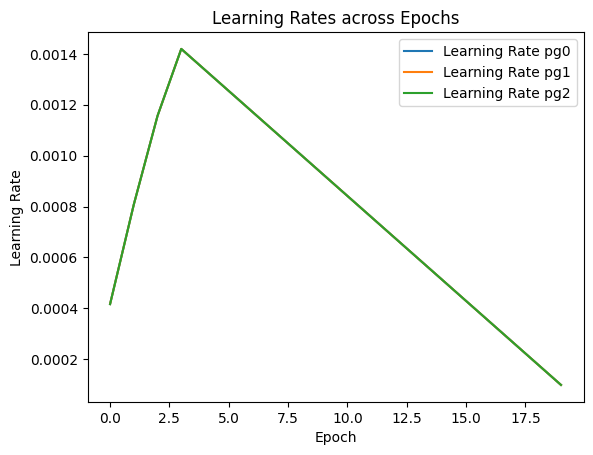

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = 'runs/detect/train/results.csv'  # Update the path if necessary
df = pd.read_csv(csv_path)

# Plot mAP@0.50 and mAP@0.50:0.95 across epochs
plt.figure()
plt.plot(df['metrics/mAP50(B)'], label='mAP@0.50')
plt.plot(df['metrics/mAP50-95(B)'], label='mAP@0.50:0.95')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('mAP across Epochs')
plt.legend()
plt.show()

# Plot Validation Losses
plt.figure()
plt.plot(df['val/box_loss'], label='Box Loss')
plt.plot(df['val/cls_loss'], label='Classification Loss')
plt.plot(df['val/dfl_loss'], label='DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Losses across Epochs')
plt.legend()
plt.show()

# Optionally, plot learning rates
plt.figure()
plt.plot(df['lr/pg0'], label='Learning Rate pg0')
plt.plot(df['lr/pg1'], label='Learning Rate pg1')
plt.plot(df['lr/pg2'], label='Learning Rate pg2')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rates across Epochs')
plt.legend()
plt.show()


In [ ]:
#segmentation
import cv2
import os

# Define paths
mask_dir = "/content/drive/MyDrive/seg_out_enhanced"  # Directory with binary mask images
label_dir = "/content/drive/MyDrive/Segmentation_labels"       # Directory to save YOLO-format label files
os.makedirs(label_dir, exist_ok=True)

# Define class index (for pallets, set to 0 based on your description)
class_index = 0

# Function to normalize coordinates
def normalize_coordinates(coords, width, height):
    return [(x / width, y / height) for (x, y) in coords]

# Process each mask image
for mask_filename in os.listdir(mask_dir):
    if mask_filename.endswith(".png") or mask_filename.endswith(".jpg"):
        # Load the mask image
        mask_path = os.path.join(mask_dir, mask_filename)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        height, width = mask.shape

        # Find contours (object boundaries) in the binary mask
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Prepare the label file
        label_path = os.path.join(label_dir, f"{os.path.splitext(mask_filename)[0]}.txt")
        with open(label_path, "w") as f:
            # Process each contour
            for contour in contours:
                # Simplify the contour to reduce the number of points (optional)
                epsilon = 0.01 * cv2.arcLength(contour, True)
                contour = cv2.approxPolyDP(contour, epsilon, True)

                # Get normalized coordinates of the contour points
                normalized_coords = normalize_coordinates(contour.reshape(-1, 2), width, height)

                # Format coordinates into the YOLO format string
                coord_str = " ".join(f"{x:.3f} {y:.3f}" for x, y in normalized_coords)
                # Write the class index and coordinates to the label file
                f.write(f"{class_index} {coord_str}\n")

print("YOLO segmentation labels generated successfully!")


RuntimeError: DataLoader worker (pid 28885) exited unexpectedly with exit code 1. Details are lost due to multiprocessing. Rerunning with num_workers=0 may give better error trace.

In [ ]:
import os
import numpy as np
import cv2

# Define paths
txt_file_path = "/content/drive/MyDrive/Segmentation_labels/1579163715848-79_jpg.rf.01cce78460c67b680cfab8c4dd0f5498.txt"  # Path to your segmentation .txt file
orig_image_path = "/content/drive/MyDrive/Pallets/1000736-6303_jpg.rf.92c0d6c8403755071eac22527c9ad815.jpg"  # Path to save the binary mask
original_img = cv2.imread(orig_image_path)
output_image_path = "test_img4.jpg"
print(original_img.shape)
image_width = 416  # Replace with the original image width
image_height = 416  # Replace with the original image height

# Initialize a blank binary mask
binary_mask = np.zeros((image_height, image_width), dtype=np.uint8)

# Load the segmentation data from the .txt file
with open(txt_file_path, "r") as f:
    for line in f:
        parts = line.strip().split()
        if not parts:
            continue

        # The first part is the class index (we'll ignore it here)
        class_index = int(parts[0])

        # The remaining parts are the normalized coordinates
        coords = list(map(float, parts[1:]))

        # Group coordinates into (x, y) pairs and denormalize
        polygon = []
        for i in range(0, len(coords), 2):
            x = int(coords[i] * image_width)
            y = int(coords[i + 1] * image_height)
            polygon.append((x, y))

        # Draw the polygon on the binary mask
        polygon = np.array([polygon], dtype=np.int32)
        cv2.fillPoly(binary_mask, polygon, 255)  # Fill the polygon with white (255) on the mask

# Save the binary mask
cv2.imwrite(output_image_path, binary_mask)
print(f"Binary mask saved to {output_image_path}")


(416, 416, 3)
Binary mask saved to test_img4.jpg


In [ ]:
# To segment manually using SAM large
!git clone https://github.com/facebookresearch/segment-anything.git
%cd segment-anything

import os
import cv2
import numpy as np
import torch
from segment_anything import SamPredictor, sam_model_registry
from PIL import Image

# Initialize SAM model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sam_model_type = "vit_l"  # Choose the model type (e.g., vit_b, vit_l, vit_h)
sam_checkpoint = "/content/drive/MyDrive/sam_vit_l_0b3195.pth"  # Path to SAM model weights
sam = sam_model_registry[sam_model_type](checkpoint=sam_checkpoint).to(device)
predictor = SamPredictor(sam)

# Paths to images and YOLO annotations
image_dir = "/content/drive/MyDrive/Pallets"  # Directory with input images
annotation_dir = "/content/drive/MyDrive/Pallet_Annotation/yolo_annotations_enhanced"  # Directory with YOLO annotations
output_dir = "/content/drive/MyDrive/seg_out_enhanced"  # Output directory for segmentation maps
label_output_dir = "/content/drive/MyDrive/seg_labels_enhanced"  # Output directory for labels
# os.makedirs(output_dir, exist_ok=True)
os.makedirs(label_output_dir, exist_ok=True)

# Function to load YOLO annotations
def load_yolo_boxes(annotation_file, img_width, img_height):
    boxes = []
    with open(annotation_file, "r") as f:
        for line in f:
            parts = line.strip().split()
            # if not parts[0].isdigit():
            parts = parts[1:]
            x_center, y_center, width, height = map(float, parts)
            x_min = max(0, int((x_center - width / 2) * img_width))
            y_min = max(0, int((y_center - height / 2) * img_height))
            x_max = int((x_center + width / 2) * img_width)
            y_max = int((y_center + height / 2) * img_height)
            if x_max > x_min and y_max > y_min:
                boxes.append([x_min, y_min, x_max, y_max])
    return boxes

count = 0
# Process each image and its corresponding annotation
for image_filename in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_filename)
    annotation_path = os.path.join(annotation_dir, os.path.splitext(image_filename)[0] + ".txt")

    # Load image
    image = np.array(Image.open(image_path).convert("RGB"))
    img_height, img_width = image.shape[:2]

    # Load YOLO bounding boxes
    if not os.path.exists(annotation_path):
        print("Annotation not found:", annotation_path)
        continue
    boxes = load_yolo_boxes(annotation_path, img_width, img_height)

    # Prepare image for SAM
    predictor.set_image(image)
    boxes = np.array(boxes)
    combined_mask = np.zeros((img_height, img_width), dtype=np.uint8)

    # Label file path for this image
    label_path = os.path.join(label_output_dir, f"{os.path.splitext(image_filename)[0]}.txt")
    with open(label_path, "w") as label_file:

        # Generate segmentation masks and save in text format for each bounding box
        for box in boxes:
            mask, _, _ = predictor.predict(box=box, multimask_output=False)
            mask = mask[0].astype(np.uint8) * 255  # Convert boolean mask to binary (0 or 255)

            # Resize the mask to fit the bounding box location within the combined mask
            x_min, y_min, x_max, y_max = box
            resized_mask = cv2.resize(mask, (x_max - x_min, y_max - y_min))

            # Place the resized mask in the correct location in the combined mask
            combined_mask[y_min:y_max, x_min:x_max] = np.maximum(combined_mask[y_min:y_max, x_min:x_max], resized_mask)

            # Find contours in the mask to extract points for each object
            contours, _ = cv2.findContours(resized_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # For each contour, normalize coordinates and save to .txt file
            for contour in contours:
                # Normalize the coordinates of the contour points
                normalized_coords = [
                    (x_min + x) / img_width for x, _ in contour[:, 0, :]
                ] + [
                    (y_min + y) / img_height for _, y in contour[:, 0, :]
                ]
                # Flatten the list of coordinates
                coord_str = " ".join(f"{coord:.6f}" for coord in normalized_coords)

                # Write class index (0 for pallets) and coordinates to the label file
                label_file.write(f"0 {coord_str}\n")

    # Save the combined mask image
    output_filename = os.path.join(output_dir, f"{os.path.splitext(image_filename)[0]}.png")
    count += 1
    # cv2.imwrite(output_filename, combined_mask)

print(f"Segmentation maps and labels saved. Total processed images: {count}")


Cloning into 'segment-anything'...
remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 304 (delta 2), reused 3 (delta 1), pack-reused 298 (from 1)
Receiving objects: 100% (304/304), 18.31 MiB | 37.20 MiB/s, done.
Resolving deltas: 100% (159/159), done.
/content/segment-anything/segment-anything


/content/segment-anything/segment_anything/modeling/prompt_encoder.py:199: UserWarning: cumsum_cuda_kernel does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
  y_embed = grid.cumsum(dim=0) - 0.5
/content/segment-anything/segment_anything/modeling/prompt_encoder.py:200: UserWarning: cumsum_cuda_kernel does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
  x_embed = grid.cumsum(dim=1) - 0.5


Segmentation maps and labels saved. Total processed images: 519


In [ ]:
from ultralytics.data.annotator import auto_annotate

auto_annotate(data="/content/drive/MyDrive/Pallets", det_model="/content/runs/detect/train/weights/best.pt", sam_model="sam_b.pt", output_dir = '/content/drive/MyDrive/auto_annotate_seg')

100%|██████████| 358M/358M [00:12<00:00, 30.7MB/s]



image 1/519 /content/drive/MyDrive/Pallets/1000736-6303_jpg.rf.92c0d6c8403755071eac22527c9ad815.jpg: 640x640 3 palletss, 1 ground, 12.0ms
image 2/519 /content/drive/MyDrive/Pallets/1014902-4606_jpg.rf.6898a8c6018412c618f84392537fea7d.jpg: 640x640 1 ground, 11.1ms
image 3/519 /content/drive/MyDrive/Pallets/1041302-2676_jpg.rf.0aa375829dd491de1e616625efcd3a13.jpg: 640x640 1 pallets, 1 ground, 10.6ms
image 4/519 /content/drive/MyDrive/Pallets/1063031-9187_jpg.rf.abc38713f828736b7123d30a2f8bb827.jpg: 640x640 1 pallets, 1 ground, 10.6ms
image 5/519 /content/drive/MyDrive/Pallets/1111168-8003_jpg.rf.e38bdf04187a2016cc2300e03eeec91c.jpg: 640x640 2 palletss, 1 ground, 10.8ms
image 6/519 /content/drive/MyDrive/Pallets/1159601-461_jpg.rf.342d4b4851283dddfde219515f9861d0.jpg: 640x640 1 pallets, 1 ground, 13.2ms
image 7/519 /content/drive/MyDrive/Pallets/1210335-2054_jpg.rf.f3919fefd62f3398ac166a54ca47672e.jpg: 640x640 1 pallets, 1 ground, 10.7ms
image 8/519 /content/drive/MyDrive/Pallets/1211768

In [ ]:
# Seg

import os
import shutil
import random
import yaml

# Paths to your original images and annotations
image_dir = "/content/drive/MyDrive/Pallets"
annotation_dir = "/content/drive/MyDrive/auto_annotate_seg"

#  80% for training, 20% for validation
train_ratio = 0.8

# Define paths for the new directory structure
base_dir = "/content/drive/MyDrive/yolov11_seg"
image_train_dir = os.path.join(base_dir, "images/train")
image_val_dir = os.path.join(base_dir, "images/val")
label_train_dir = os.path.join(base_dir, "labels/train")
label_val_dir = os.path.join(base_dir, "labels/val")

# Create directories
os.makedirs(image_train_dir, exist_ok=True)
os.makedirs(image_val_dir, exist_ok=True)
os.makedirs(label_train_dir, exist_ok=True)
os.makedirs(label_val_dir, exist_ok=True)

# Get list of all images and corresponding annotations
images = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
annotations = [f.replace('.jpg', '.txt').replace('.jpeg', '.txt').replace('.png', '.txt') for f in images]

# Shuffle and split data
data = list(zip(images, annotations))
random.shuffle(data)
train_size = int(len(data) * train_ratio)
train_data = data[:train_size]
val_data = data[train_size:]

# Function to copy files to the appropriate directories
def copy_files(data, image_dest, label_dest):
    for img, ann in data:
        img_src = os.path.join(image_dir, img)
        ann_src = os.path.join(annotation_dir, ann)

        img_dest_path = os.path.join(image_dest, img)
        ann_dest_path = os.path.join(label_dest, ann)

        # Copy image and annotation if both exist
        if os.path.exists(img_src) and os.path.exists(ann_src):
            shutil.copy(img_src, img_dest_path)
            shutil.copy(ann_src, ann_dest_path)

# Copy training and validation files
copy_files(train_data, image_train_dir, label_train_dir)
copy_files(val_data, image_val_dir, label_val_dir)

print("Data split and organized successfully.")

# Define class names (adjust based on your dataset)
class_names = {0: 'pallets', 1: 'ground'}  # Replace with actual class names

# YAML file content
yaml_content = {
    "train": os.path.abspath(image_train_dir),
    "val": os.path.abspath(image_val_dir),
    "nc": len(class_names),
    "names": class_names
}

# Save YAML file
yaml_path = os.path.join(base_dir, "custom_data.yaml")
with open(yaml_path, "w") as yaml_file:
    yaml.dump(yaml_content, yaml_file, default_flow_style=False)

print("Data split, organized, and YAML file created successfully.")
print(f"YAML file saved at: {yaml_path}")


Data split and organized successfully.
Data split, organized, and YAML file created successfully.
YAML file saved at: /content/drive/MyDrive/yolov11_seg/custom_data.yaml


In [ ]:
#Segmentation
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO('yolo11n-seg.pt')  # load a pretrained YOLO detection model
results = model.train(data='/content/drive/MyDrive/yolov11_seg/custom_data.yaml', epochs=20, batch= 16, device = 0,
    hsv_h=0.015,           # HSV augmentation for hue
    hsv_s=0.7,             # HSV augmentation for saturation
    hsv_v=0.4,             # HSV augmentation for value
    degrees=10.0,          # Rotation augmentation
    translate=0.1,         # Translation augmentation
    scale=0.5,             # Scale augmentation
    shear=0.0  )  # train the model



100%|██████████| 5.90M/5.90M [00:00<00:00, 256MB/s]

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/content/drive/MyDrive/yolov11_seg/custom_data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

 13                  -1  1    111296  ultralytics.nn.modules.block.C3k2            [384, 128, 1, False]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1     32096  ultralytics.nn.modules.block.C3k2            [256, 64, 1, False]           
 17                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 19                  -1  1     86720  ultralytics.nn.modules.block.C3k2            [192, 128, 1, False]          
 20                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

train: Scanning /content/drive/MyDrive/yolov11_seg/labels/train... 415 images, 0 backgrounds, 0 corrupt: 100%|██████████| 415/415 [00:02<00:00, 140.36it/s]


train: New cache created: /content/drive/MyDrive/yolov11_seg/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/yolov11_seg/labels/val... 104 images, 0 backgrounds, 0 corrupt: 100%|██████████| 104/104 [00:00<00:00, 130.61it/s]


val: New cache created: /content/drive/MyDrive/yolov11_seg/labels/val.cache
Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20       3.5G       1.18      3.775      2.725      1.479         99        640: 100%|██████████| 26/26 [00:05<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.82it/s]

                   all        104        355     0.0108      0.925      0.505      0.331    0.00936      0.795      0.382      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.18G      1.081      2.866      2.038      1.418        122        640: 100%|██████████| 26/26 [00:04<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.94it/s]

                   all        104        355      0.634      0.181      0.466      0.305      0.528      0.151      0.343       0.23



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20       3.4G      1.146      2.872      1.731      1.456        110        640: 100%|██████████| 26/26 [00:04<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.75it/s]

                   all        104        355      0.493      0.643       0.51      0.336      0.442      0.523      0.391      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.36G       1.12      2.826      1.659      1.424        110        640: 100%|██████████| 26/26 [00:04<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]

                   all        104        355      0.425      0.562       0.43      0.248      0.382      0.487       0.33       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.29G      1.097      2.707      1.576      1.407        117        640: 100%|██████████| 26/26 [00:04<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

                   all        104        355      0.467      0.623        0.5       0.32       0.41       0.54      0.357      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.32G      1.062      2.648      1.517      1.381        108        640: 100%|██████████| 26/26 [00:04<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        104        355      0.557      0.597      0.601      0.333       0.58       0.44      0.438      0.191



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.37G      1.071      2.665      1.479      1.395         99        640: 100%|██████████| 26/26 [00:04<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.38it/s]

                   all        104        355      0.587      0.549      0.536      0.347      0.519       0.48      0.387      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.32G      1.067      2.616      1.453      1.394        106        640: 100%|██████████| 26/26 [00:04<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]

                   all        104        355      0.688      0.671      0.681      0.495      0.625      0.614       0.56      0.405



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.31G      1.035      2.587      1.377      1.365         89        640: 100%|██████████| 26/26 [00:04<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        104        355      0.627      0.672      0.667      0.517      0.584      0.585       0.54      0.409



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.27G     0.9726      2.468      1.332      1.314         96        640: 100%|██████████| 26/26 [00:04<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.48it/s]

                   all        104        355      0.703      0.704      0.691      0.547      0.626      0.624       0.56      0.431


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.15G     0.9453      2.397      1.635      1.398         44        640: 100%|██████████| 26/26 [00:05<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]

                   all        104        355      0.672      0.642      0.662      0.488        0.6      0.566      0.547      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.18G     0.8748      2.207      1.449      1.345         48        640: 100%|██████████| 26/26 [00:04<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        104        355      0.641      0.752      0.712      0.559      0.595      0.645      0.594      0.447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.18G      0.853      2.235      1.359      1.323         45        640: 100%|██████████| 26/26 [00:04<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]

                   all        104        355      0.712      0.714      0.722      0.566      0.647      0.629      0.582      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.18G     0.8243      2.178      1.325      1.299         42        640: 100%|██████████| 26/26 [00:04<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]

                   all        104        355      0.756      0.711      0.755      0.578      0.691      0.627      0.624      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.18G     0.7961      2.013      1.265      1.287         41        640: 100%|██████████| 26/26 [00:04<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]

                   all        104        355      0.765      0.748      0.753       0.58      0.683      0.657      0.596      0.456



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.18G     0.7785      1.947       1.22      1.265         48        640: 100%|██████████| 26/26 [00:04<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

                   all        104        355      0.734      0.728       0.75      0.618       0.69      0.632      0.613      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.18G     0.7292      1.881       1.18      1.221         44        640: 100%|██████████| 26/26 [00:04<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]

                   all        104        355      0.738      0.707      0.745      0.624      0.662      0.634      0.605      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.18G     0.7274      1.818      1.138      1.227         52        640: 100%|██████████| 26/26 [00:04<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]

                   all        104        355      0.713      0.745      0.759      0.638      0.649      0.673      0.613      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.15G     0.6986      1.844      1.123      1.204         43        640: 100%|██████████| 26/26 [00:04<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]

                   all        104        355      0.748       0.66      0.746      0.619      0.683      0.595      0.603       0.47



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.15G      0.695      1.817      1.124      1.204         48        640: 100%|██████████| 26/26 [00:04<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]

                   all        104        355      0.748      0.723      0.758      0.632       0.68      0.645      0.615      0.491



20 epochs completed in 0.048 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.0MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,958 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]


                   all        104        355       0.75      0.723      0.758      0.632       0.68      0.645      0.615      0.491
               pallets        102        259      0.628      0.541      0.613      0.466      0.605       0.51      0.552      0.365
                ground         96         96      0.873      0.906      0.903      0.797      0.754      0.781      0.677      0.617
Speed: 0.3ms preprocess, 1.6ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/segment/train


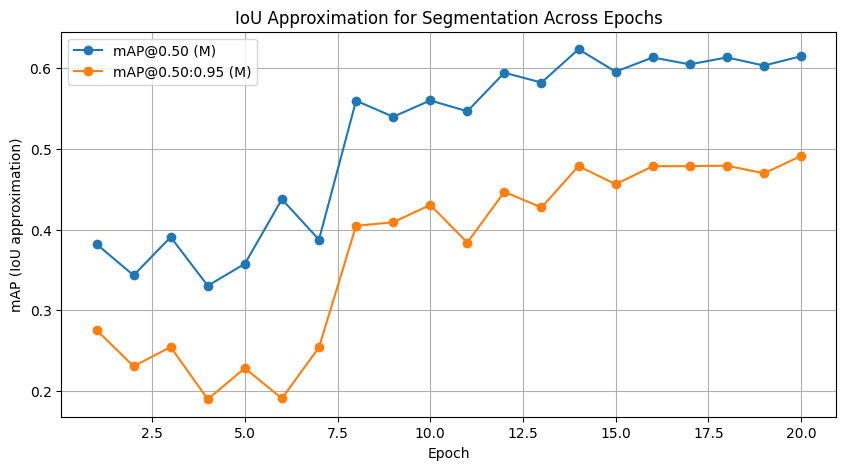

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

csv_path = 'runs/segment/train/results.csv'  # Update the path if necessary
df = pd.read_csv(csv_path)
# Extract epochs and relevant metrics
epochs = df['epoch']
mAP50_M = df['metrics/mAP50(M)']
mAP50_95_M = df['metrics/mAP50-95(M)']

# Plot mAP@0.50 and mAP@0.50:0.95 for segmentation (as IoU proxies)
plt.figure(figsize=(10, 5))
plt.plot(epochs, mAP50_M, label='mAP@0.50 (M)', marker='o')
plt.plot(epochs, mAP50_95_M, label='mAP@0.50:0.95 (M)', marker='o')
plt.xlabel('Epoch')
plt.ylabel('mAP (IoU approximation)')
plt.title('IoU Approximation for Segmentation Across Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from ultralytics import YOLO
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the model
model = YOLO('/content/runs/segment/train/weights/best.pt')  # Load your trained model

# Run inference
results = model('/content/drive/MyDrive/Pallets/1564564911809-95_jpg.rf.adc540423f21cee4f83a6c80f51d7d7e.jpg')  # Predict on the image

for res in results :
  res.save('TEST.png')




image 1/1 /content/drive/MyDrive/Pallets/1564564911809-95_jpg.rf.adc540423f21cee4f83a6c80f51d7d7e.jpg: 640x640 2 palletss, 1 ground, 13.7ms
Speed: 2.6ms preprocess, 13.7ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)
